# Introduction

Time in the limelight as long as that of Taylor Swift is rare in the volatile music industry. With a career spanning over 16 years and counting, 9 albums over 3 genres, and over 200 songs, whether you hate her or love her, it is no question that her discography is impressive. Often, music experts and her fans credit the reason for her continued relevance and success to her principal role and involvement in the songwriting and music production process of her albums. In particular, Taylor Swift has gained a reputation for her narrative songwriting style and detailed lyricism. As a result, since her debut, though she has matured from a wide-eyed teenage country singer to an international sensation, her growth is evident through her musical evolution, while remaining musically uniquely and authentically herself. With my research, I hope to investigate “How has the lexicon and themes of Taylor Swift’s songwriting changed over time?”

### Motive
With my data analysis, I hope to provide Taylor Swift newbies with a quick introduction to the topics and lyrical style covered throughout her discography, as well as potentially provide a pattern for dedicated Swifties to analyze and predict her next moves. Moreover, I’d be interested in determining the validity of criticism that she primarily writes breakup songs.

### Data
For my data analysis, I am using a dataset from Kaggle entitled “Taylor Swift Song Lyrics (All Albums)” at https://www.kaggle.com/thespacefreak/taylor-swift-song-lyrics-all-albums which includes lyrics of every song from her debut album to Fearless (Taylor’s Version), as listed below:
- Taylor Swift
- Fearless (Taylor's Version)
- Speak Now (Deluxe Version)
- Red (Deluxe Version)
- 1989 (Deluxe Version)
- reputation
- Lover
- folklore (Deluxe Version)
- evermore (Deluxe Version)

Prioritizing Taylor's Version re-recordings and then Deluxe versions of albums when available are ideal for my data analysis since this maximizes inclusion of her songs. However, the dataset only includes songs released within her albums, and therefore does not include songs she wrote for other artists or songs released along with films such as “Safe and Sound,” “I Don’t Want To Live Forever,” or “Only the Young” since they were released with Hunger Games, 50 Shades Darker, and Miss Americana respectively.

However, since the dataset has been published, Taylor Swift has released Red (Taylor's Version) which is a re-recording of her Red album, along with 9 additional previously unreleased Vault songs. Therefore, this dataset is missing these Vault songs. 

# Read Taylor Swift lyrics data from each album.

In [1]:
import pandas as pd

In [2]:
albums = {}
albums['debut'] = pd.read_csv('data/01-taylor_swift.csv')
albums['fearless'] = pd.read_csv('data/02-fearless_taylors_version.csv')
albums['speakNow'] = pd.read_csv('data/03-speak_now_deluxe_package.csv')
albums['red'] = pd.read_csv('data/04-red_deluxe_edition.csv')
albums['1989'] = pd.read_csv('data/05-1989_deluxe.csv')
albums['reputation'] = pd.read_csv('data/06-reputation.csv')
albums['lover'] = pd.read_csv('data/07-lover.csv')
albums['folklore'] = pd.read_csv('data/08-folklore_deluxe_version.csv')
albums['evermore'] = pd.read_csv('data/09-evermore_deluxe_version.csv')

In [3]:
for k in albums.keys():
    print(k.upper(), end=": ")
    print(albums[k].shape)

DEBUT: (609, 5)
FEARLESS: (1170, 5)
SPEAKNOW: (945, 5)
RED: (1072, 5)
1989: (1006, 5)
REP: (988, 5)
LOVER: (934, 5)
FOLKLORE: (722, 5)
EVERMORE: (912, 5)


In [4]:
for k in albums.keys():
    print(k.upper() + ": ")
    print(albums[k].head())
    print()

DEBUT: 
     album_name track_title  track_n  \
0  Taylor Swift  Tim McGraw        1   
1  Taylor Swift  Tim McGraw        1   
2  Taylor Swift  Tim McGraw        1   
3  Taylor Swift  Tim McGraw        1   
4  Taylor Swift  Tim McGraw        1   

                                         lyric  line  
0          He said the way my blue eyes shined     1  
1  Put those Georgia stars to shame that night     2  
2                       I said, "That's a lie"     3  
3                  Just a boy in a Chevy truck     4  
4         That had a tendency of gettin' stuck     5  

FEARLESS: 
                    album_name                  track_title  track_n  \
0  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
1  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
2  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
3  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
4  Fearless (Taylor’s Version)  Fearless (Taylor’

In [5]:
for k in albums.keys():
    print(k.upper() +  ": ")
    print(albums[k].describe())
    print()

DEBUT: 
          track_n        line
count  609.000000  609.000000
mean     7.991790   22.095238
std      4.394404   13.619505
min      1.000000    1.000000
25%      4.000000   11.000000
50%      8.000000   21.000000
75%     12.000000   32.000000
max     15.000000   55.000000

FEARLESS: 
           track_n         line
count  1170.000000  1170.000000
mean     13.370940    23.754701
std       7.458526    14.226705
min       1.000000     1.000000
25%       7.000000    12.000000
50%      14.000000    23.000000
75%      20.000000    34.000000
max      26.000000    58.000000

SPEAKNOW: 
          track_n        line
count  945.000000  945.000000
mean     8.941799   29.088889
std      4.769674   17.536056
min      1.000000    1.000000
25%      5.000000   14.000000
50%      9.000000   28.000000
75%     13.000000   42.000000
max     17.000000   82.000000

RED: 
           track_n         line
count  1072.000000  1072.000000
mean     11.186567    25.932836
std       6.359939    15.729185
min  

In [6]:
for k in albums.keys():
    print(k + " has " + str(len(albums[k].track_title.unique())) + " songs")

debut has 15 songs
fearless has 26 songs
speakNow has 17 songs
red has 22 songs
1989 has 16 songs
rep has 15 songs
lover has 18 songs
folklore has 17 songs
evermore has 17 songs


In [8]:
for k in albums.keys():
    print(k + "'s longest song has " + str(albums[k].line.max()) + " lines")

debut's longest song has 55 lines
fearless's longest song has 58 lines
speakNow's longest song has 82 lines
red's longest song has 65 lines
1989's longest song has 85 lines
rep's longest song has 80 lines
lover's longest song has 66 lines
folklore's longest song has 67 lines
evermore's longest song has 69 lines


# Retrieve missing data.

### Use requests and BeautifulSoup to make a list of all 'From the Vault' songs on Red (Taylor's Version).

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [10]:
response = requests.get('https://genius.com/albums/Taylor-swift/Red-taylors-version')
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")

In [11]:
vaults = {}
datasets = document.find_all('a', attrs={'class':'u-display_block'})

for i in range(len(datasets)):
    if "Vault" in datasets[i].text:
        title = str(datasets[i].text.strip())
        end = title.find("]")
        title = title[:end + 1]
        vaults[title] = []

### Use Genius API to scrape lyrics for new vault songs of Red's (Taylor's Version) that main dataset source is missing.

In [12]:
pip install git+https://github.com/johnwmillr/LyricsGenius.git

  Cloning https://github.com/johnwmillr/LyricsGenius.git to /tmp/pip-req-build-herfifru
  Running command git clone -q https://github.com/johnwmillr/LyricsGenius.git /tmp/pip-req-build-herfifru
  Resolved https://github.com/johnwmillr/LyricsGenius.git to commit fa9528551043cd60376b900a0adacf239a93fae5
  Created wheel for lyricsgenius: filename=lyricsgenius-3.0.1-py3-none-any.whl size=44688 sha256=8e81bd3cbe85bb9a58e3ae9acce9bf1f62e4811900c9a11f4b94f512492f5169
  Stored in directory: /tmp/pip-ephem-wheel-cache-13jgg4us/wheels/22/d8/54/6e236bc9517965a346a5b6cd223931b13f1eb6ba8676f1078c
Successfully built lyricsgenius
Note: you may need to restart the kernel to use updated packages.


In [13]:
import lyricsgenius as genius
import geniusKey

api = genius.Genius(geniusKey.MY_KEY)

In [14]:
def populateLyrics(title):
    res = api.search_song(title)
    lines = res.lyrics.split('\n') 
    lines = [ x for x in lines if "[" not in x and x != ""]
    lines[-1] = lines[-1][:-7]
    vaults[title] = lines

In [15]:
for k in vaults.keys():
    populateLyrics(k)
title = "All Too Well (10 Minute Version) (Taylor's Version) [From the Vault]"
vaults[title][-1] = vaults[title][-1][:-1]

Searching for "Better Man (Taylor's Version) [From the Vault]"...
Done.
Searching for "Nothing New (Taylor's Version) [From the Vault]"...
Done.
Searching for "Babe (Taylor's Version) [From the Vault]"...
Done.
Searching for "Message In A Bottle (Taylor's Version) [From The Vault]"...
Done.
Searching for "I Bet You Think About Me (Taylor's Version) [From the Vault]"...
Done.
Searching for "Forever Winter (Taylor's Version) [From the Vault]"...
Done.
Searching for "Run (Taylor's Version) [From the Vault]"...
Done.
Searching for "The Very First Night (Taylor's Version) [From the Vault]"...
Done.
Searching for "All Too Well (10 Minute Version) (Taylor's Version) [From the Vault]"...
Done.


### Append new data to existing dataframe

In [16]:
def appendSong(title):
    size = len(vaults[title])
    a = {"album_name" : ["Red (Taylor's Version)"] * size, 
         "track_title": [title] * size, 
         "track_n": [-1] * size, # value unimportant bc column will be dropped later
         "lyric": vaults[title],
         "line": [ i for i in range(1, size + 1) ]
        }
    df = pd.DataFrame(a)
    df = pd.concat([albums['red'], df])
    df.reset_index(drop=True, inplace=True)
    return df

In [17]:
for k in vaults.keys():
    albums['red'] = appendSong(k)

### Replace all album names of "Red (Deluxe Edition) to "Red (Taylor's Version)" for consistency. This is possible because songs on the Red (Taylor's Version) album are simply re-recordings with identical lyrics as the songs on the Red (Deluxe Edition) album.

In [18]:
albums['red'] = albums['red'].replace("Red (Deluxe Edition)", "Red (Taylor's Version)")

# Clean up and reorganize data.

### Group by track title within each dataframe by concatenating strings of line lyrics.

In [19]:
def groupBySongs(df):
    df['lyric'] = df.groupby(['track_title'])['lyric'].transform(lambda x : ' '.join(x))
    df['line'] = df.groupby(df['track_title'])['line'].transform(lambda x : max(x))
    df.rename(columns={'line': 'lines'}, inplace=True)
    df.rename(columns={'lyric': 'lyrics'}, inplace=True)
    df.drop(columns=['track_n'], inplace=True)
    df.drop_duplicates(inplace=True)  
    df.reset_index(drop=True, inplace=True)
    return df
# lyric column now holds entirety of song's lyrics
# lines column now represents total number of lines in song

In [20]:
for k in albums.keys():
    albums[k] = groupBySongs(albums[k])

### Drop lyrical repeats from different versions of the same song (acoustic/pop vs original). 

In [21]:
# for k in albums.keys():
#     print(albums[k])
    
# drop "Teardrops on My Guitar (Pop Version)"
albums['debut'] = albums['debut'][albums['debut'].track_title != "Teardrops on My Guitar (Pop Version)"]
albums['debut'].reset_index(drop=True, inplace=True)

# drop Forever & Always (Piano Version) (Taylor's Version)
albums['fearless'] = albums['fearless'][albums['fearless'].track_title != "Forever & Always (Piano Version) [Taylor’s Version]"]
albums['fearless'].reset_index(drop=True, inplace=True)

# drop Treacherous (Original Demo Recording), Red (Original Demo Recording), and State of Grace (Acoustic Version)
albums['red'] = albums['red'][albums['red'].track_title.str.contains('Demo') == False]
albums['red'] = albums['red'][albums['red'].track_title.str.contains('Acoustic') == False]
albums['red'].reset_index(drop=True, inplace=True)

### Clean up lyrics. Set everything to lowercase and ignore non-ascii characters.

In [22]:
def cleanLyrics():
    for k,v in albums.items():
        for i in range(len(v)):
            lyrics = albums[k].loc[i, 'lyrics']
            lyrics = lyrics.encode('ascii', 'ignore').decode()
            lyrics = lyrics.replace("-", " ")
            lyrics = lyrics.replace("wanna", "want to")
            lyrics = lyrics.replace("Joeboy 'Sip (Alcohol)' Official Lyrics & Meaning | Verified", "")
            albums[k].loc[i, 'lyrics'] = lyrics
cleanLyrics()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### Create exploratory data visualizations.

In [23]:
import matplotlib.pyplot as plt

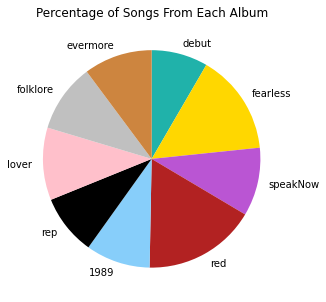

In [154]:
albumColors = ['lightseagreen', 'gold', 'mediumorchid', 'firebrick', 'lightskyblue', 'black', 'pink', 'silver', 'peru']
plt.figure(figsize=(8,5))
plt.pie([albums[k]['track_title'].count() for k in albums.keys()], labels=albums.keys(), colors=albumColors, startangle=90, counterclock=False)
plt.title("Percentage of Songs From Each Album")
plt.show()

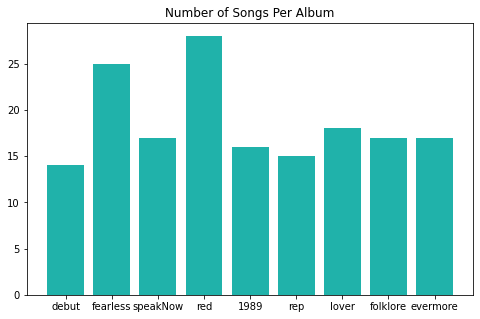

In [155]:
plt.figure(figsize=(8,5))
plt.bar(albums.keys(), [albums[k]['track_title'].count() for k in albums.keys()], color='lightseagreen')
plt.title("Number of Songs Per Album")
plt.show()

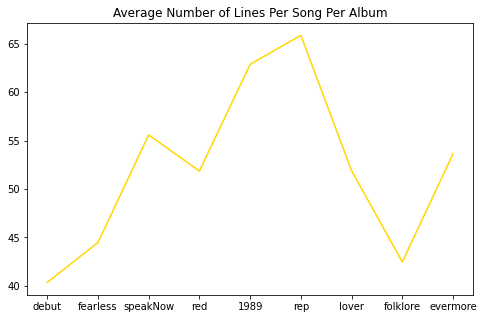

In [156]:
plt.figure(figsize=(8,5))
plt.plot(albums.keys(), [albums[k].lines.mean() for k in albums.keys()], color='gold')
plt.title("Average Number of Lines Per Song Per Album")
plt.show()

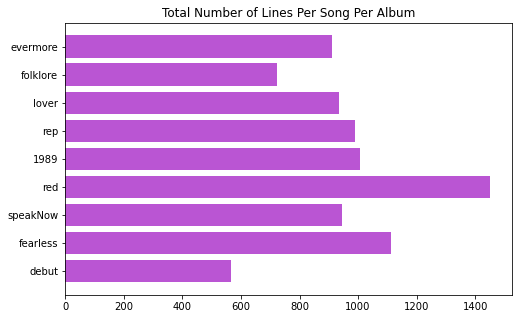

In [157]:
plt.figure(figsize=(8,5))
plt.barh(list(albums.keys()), [albums[k].lines.sum() for k in albums.keys()], color='mediumorchid')
plt.title("Total Number of Lines Per Song Per Album")
plt.show()

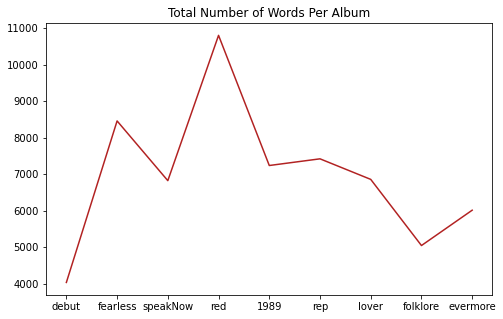

In [158]:
numWords = []
for k in albums.keys():
    sum = 0
    for i in range(len(albums[k])):
        sum += len(albums[k].lyrics[i].split())
    numWords.append(sum)

plt.figure(figsize=(8,5))
plt.plot(albums.keys(), numWords, color='firebrick')
plt.title("Total Number of Words Per Album")
plt.show()

In all of the exploratory data analysis, it is clear that the Red album has the most amount of songs, words, and lines per album, followed consistently by Fearless. This data makes sense since these are the two albums which have Taylor's Versions and includes the additional previously-unreleased Vault songs. Furthermore, the Red album has by far the highest total number of words and lines per album, even far surprassing the numbers for Fearless, which makes sense since the album includes a 10-minute long song. On the other hand, her debut self-titled album has the least number of songs, total lines, average lines per song and words than any other album. 

Interestingly, although the Reputation album has the second-lowest number of songs, it also has the highest average number of lines per song, even surpassing Red with its 10-minute song. 

Additionally, the three albums that have won a Grammy for album of the year are Fearless, 1989, and folklore. However, there does not seem to be any pattern or connection between the three for number of songs, number of lines, average number of lines per song, or total number of words per album to indicate a predictable recipe for success. 

# Analyze data.

In [33]:
# lyrics =  dictionary with same keys as albums that maps albumName -> ALL lyrics
# This is so that we can use it for word clouds and sentiment analysis.

lyrics = {}
for k in albums.keys():
    words = " ".join(list(albums[k].lyrics))
    lyrics[k] = words

### TODO: modify stopwords (remove some, add some)

### Tokenize and remove stopwords and punctuation. Store results as a Frequency Distribution.

In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.probability import FreqDist
# from nltk.stem.lancaster import LancasterStemmer


# for k,v in albums.items():
#     for i in range(len(v)):
#         lyrics = albums[k].loc[i, 'lyrics']
#         tokens = word_tokenize(lyrics.lower())
#         removed = [ word for word in tokens if not word.isalpha()]
#         print(removed)

# nested dictionary: freqs dict holds same keys as album --> dict with song name key to FreqDist
def createFreqDists(drops):
    remove = stopwords.words('english') + list(punctuation) + drops
    remove.extend(['oh','mmmm', 'mm', 'na', 'di', 'ooh', 'ca', 'ah', 'ha', 'yeah', 'la', 'eh', 'da', 'hey'])
    freqs = {}
    for k,v in albums.items():
        albumLyrics = []
        for i in range(len(v)):
            lyrics = albums[k].loc[i, 'lyrics']
            title = albums[k].loc[i, 'track_title']
            tokens = word_tokenize(lyrics.lower())
            edited = [ word for word in tokens if word not in remove and word.isalpha()]
#             edited = [LancasterStemmer().stem(w) for w in edited]
            albumLyrics.extend(edited)
        freqs[k] = FreqDist(albumLyrics)
    return freqs

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
freqs = createFreqDists([])

### TODO: GRAPH NUMBER OF UNIQUE WORDS (EXCLUDING STOPWORDS AND SOUNDS)

### Determine words standard to Taylor's corpus.

In [36]:
mostCommon = []
for k in freqs.keys():
    print(k, end=": ")
    for tup in freqs[k].most_common()[:10]:
        print(tup[0], end = ", ")
    print()
    mostCommon.append(freqs[k].max())
mostCommon = set(mostCommon)

debut: want, know, back, think, never, would, said, see, one, beautiful, 
fearless: know, come, like, baby, never, way, say, time, feel, want, 
speakNow: back, like, know, come, ever, never, see, go, say, time, 
red: like, know, time, never, one, back, run, red, better, love, 
1989: love, shake, yet, wish, got, new, back, like, baby, go, 
rep: want, made, like, look, call, baby, time, know, first, bad, 
lover: want, like, love, never, see, daylight, know, one, get, baby, 
folklore: never, like, know, time, would, one, think, gave, knew, love, 
evermore: know, like, could, think, right, thing, left, one, never, go, 


### Graph the change in frequency of Taylor's most used words per album over her entire discography

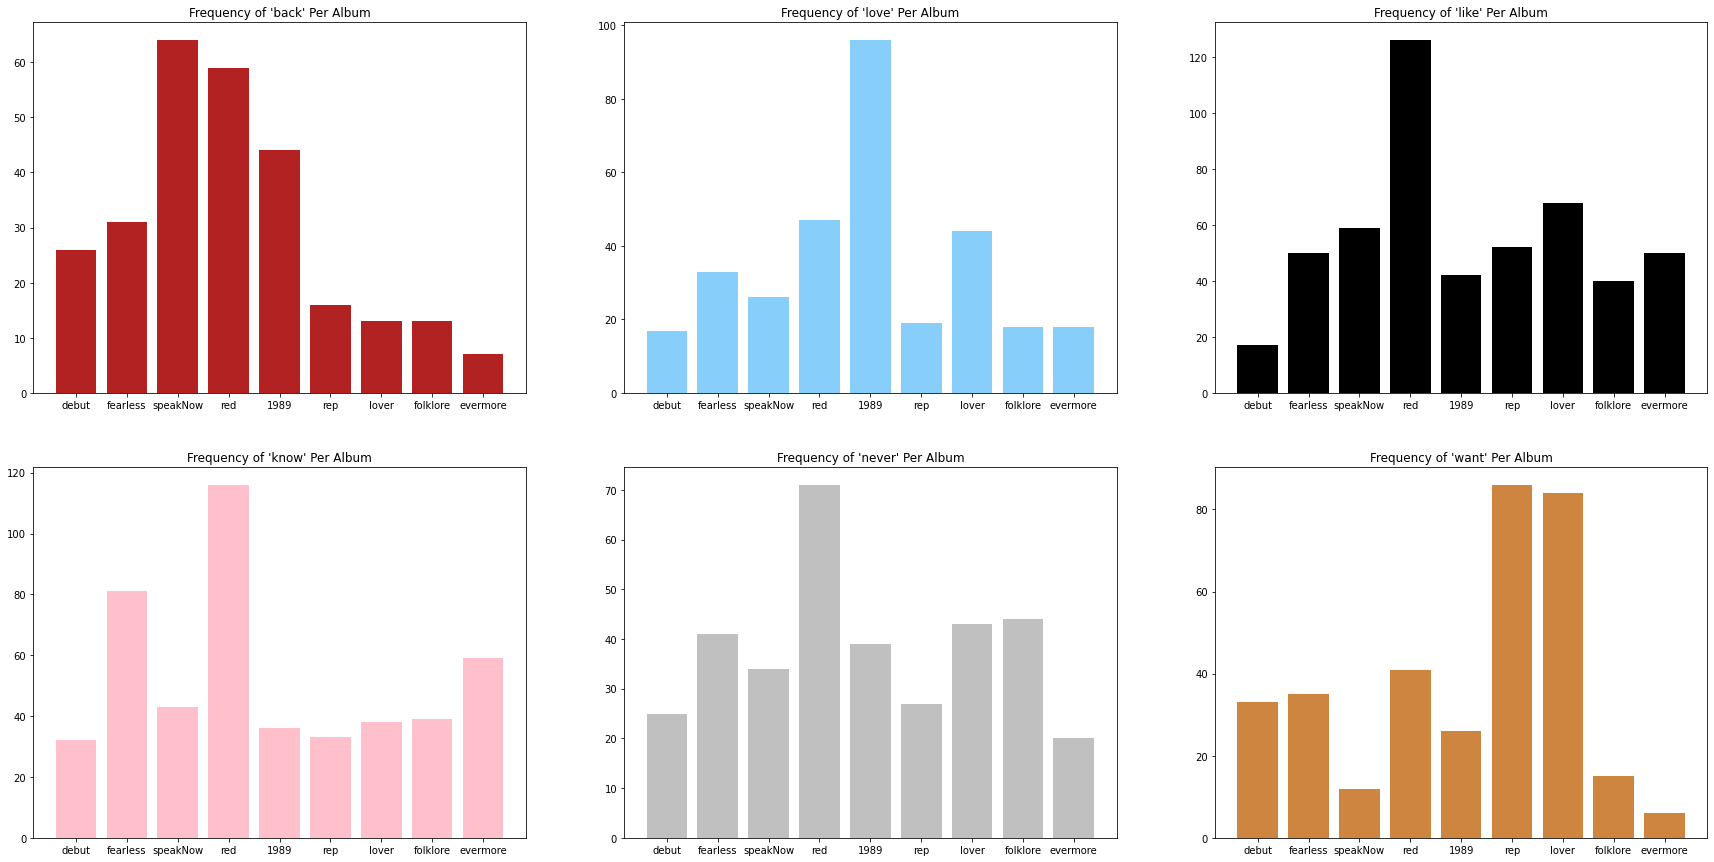

In [145]:
import math

albumColors = ['lightseagreen', 'gold', 'mediumorchid', 'firebrick', 'lightskyblue', 'black', 'pink', 'silver', 'peru']
fig, ax = plt.subplots(2, 3, figsize=(30, 15))
color = 3
i = 0
for word in mostCommon:
    r = math.floor(i/3)
    c = i%3
    ax[r, c].bar(freqs.keys(), [freqs[k][word] for k in freqs.keys()], color=albumColors[color])
    ax[r, c].set_title("Frequency of '" + word + "' Per Album")
    i += 1
    color += 1

### TODO: COMMENT ON DATA VISUALIZATION ANALYSIS

### Drop words standard to Taylor's corpus (Taylor's stopwords).

In [183]:
tops = []
for k in freqs.keys():
    topTuples = freqs[k].most_common()[:10]
    for tup in topTuples:
        tops.append(tup[0])
duplicates = [ word for word in tops if tops.count(word) > 3 ]
duplicates = FreqDist(duplicates)
print(duplicates.items())

drops = list(duplicates.keys()) # get, let, gonna, 

freqsEdited = createFreqDists(drops)
for k in freqsEdited.keys():
    print(k, end=": ")
    for tup in freqsEdited[k].most_common()[:10]:
        print(tup[0], end = ", ")
    print()

dict_items([('want', 4), ('know', 8), ('back', 4), ('never', 7), ('one', 5), ('like', 8), ('baby', 4), ('time', 5), ('love', 4)])
debut: think, would, said, see, beautiful, way, song, take, hope, still, 
fearless: come, way, say, feel, see, said, got, could, everything, bye, 
speakNow: come, ever, see, go, say, around, away, still, mean, mind, 
red: run, red, better, last, ever, night, could, got, think, go, 
1989: shake, yet, wish, got, new, go, woods, clear, would, could, 
rep: made, look, call, first, bad, say, good, could, take, hands, 
lover: see, daylight, get, man, right, go, could, say, street, got, 
folklore: would, think, gave, knew, around, could, see, still, said, come, 
evermore: could, think, right, thing, left, go, got, stay, would, man, 


### TODO: create album themes
debut: 
fearless: 
speak now: growth and change
red:
1989:
reputation:
lover: city
folklore:
evermore:

### Create Wordclouds for each album.

In [40]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

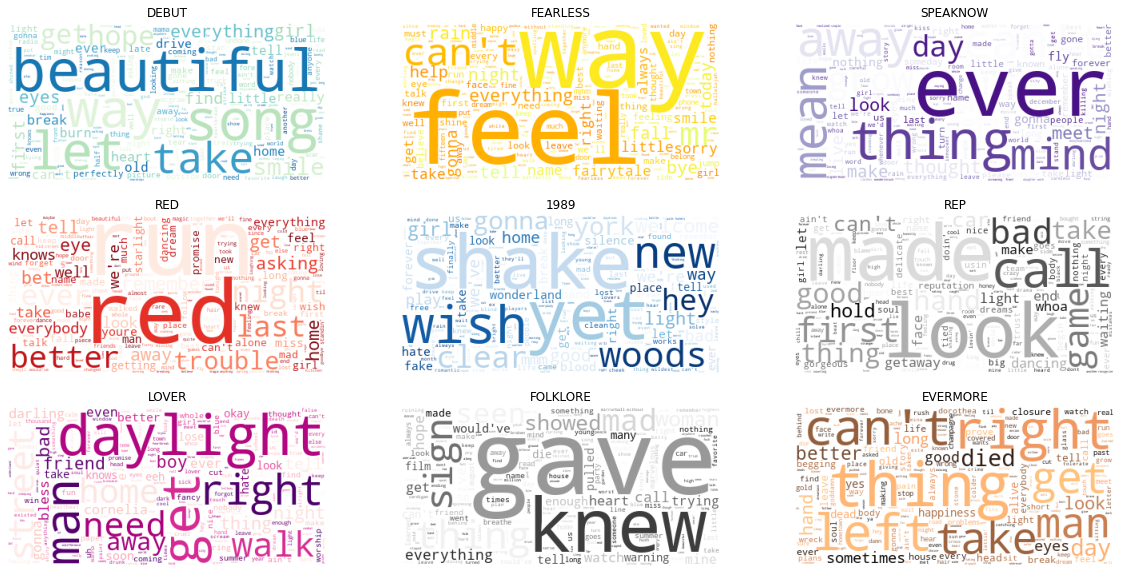

In [179]:
remove = ['oh','mmmm', 'mm', 'na', 'di', 'ooh', 'ca', 'ah', 'ha', 'yeah', 'la', 'eh', 'da', 'ra', "i'm", "i'll", "i've", "i'd", "cause"]
remove.extend(stopwords.words('english'))
# remove.extend(drops)
colormaps = ['GnBu', 'Wistia', 'Purples', 'Reds', 'Blues', 'binary', 'RdPu', 'Greys', 'copper']

i = 0
fig = plt.figure(figsize=(20,10))
for k in lyrics.keys():
    words = lyrics[k].lower()
    wordcloud = WordCloud(stopwords=remove, collocations=False, background_color="white", colormap=colormaps[i]).generate(words)
    ax = fig.add_subplot(3,3,i+1)
    ax.set_title(k.upper())
    ax.imshow(wordcloud)
    ax.axis('off')
    i += 1

### TODO: Perform aggregate sentiment analysis (either each song separately and mean for entire album, or for entire album altogther)

### TODO: Graph values of sentiment analysis per album

In [39]:
# for k,v in albums.items():
#     print(k + ": " + str(albums[k].shape))
#     v.to_text("check/" + k + ".", index=False)
# print(albums['fearless'].loc[15, 'track_title'])
# albums['fearless'].to_csv("check/fearless.csv", index=False)


# with open('check/fearless.txt', 'w+') as f:
#     for lyrics in albums['fearless']['lyrics']:
#         f.write('%s\n' %lyrics)
#         f.write('\n')
#     f.close()

#     print("File written successfully")

# SUMMARY TO DOs by priority:
- perform sentiment analysis and graph 
- finalize stopwords choices
- create album topic themes
- comment on word frequencies
- update word cloud font
- apply imagecolorgenerator to use colors from each album
    